In [1]:
import torch

In [2]:
torch.__version__

'2.6.0+cu124'

#Scalars, vectors, matrices, tensors:

In [3]:
tensor0d = torch.tensor(1)
tensor1d = torch.tensor([1,2,3])
tensor2d = torch.tensor([[1, 2], [3, 4]])
tensor3d = torch.tensor([[[1, 1], [2, 3]], [[1, 5], [8, 9]]])

In [4]:
print(tensor1d.dtype)

torch.int64


In [5]:
floattensor = torch.tensor([1.0, 2.0, 3.0])
floattensor.dtype

torch.float32

In [6]:
converted_tensor = tensor1d.to(torch.float32)
converted_tensor.dtype

torch.float32

#Common PyTorch tensor operations:

## Create Tensors:

In [7]:
new_tensor = torch.tensor(1)
new_tensor

tensor(1)

## Shape of Tensors:

In [8]:
tensor2d = torch.tensor([[1, 2, 3],
[4, 5, 6]])

In [9]:
tensor2d.shape

torch.Size([2, 3])

In [10]:
tensor2d.reshape(3, 2)

tensor([[1, 2],
        [3, 4],
        [5, 6]])

In [11]:
tensor2d.view((3, 2))

tensor([[1, 2],
        [3, 4],
        [5, 6]])

## Transpose:

In [12]:
tensor2d.T

tensor([[1, 4],
        [2, 5],
        [3, 6]])

## Matrix multiplication:

In [13]:
tensor2d.matmul(tensor2d.T)

tensor([[14, 32],
        [32, 77]])

In [14]:
tensor2d @ tensor2d.T

tensor([[14, 32],
        [32, 77]])

# Computational Graph:

In [15]:
import torch.nn.functional as F

In [16]:
y = torch.tensor([1.0]) # true label
x1 = torch.tensor([1.1]) # input
w1 = torch.tensor([2.2], requires_grad=True) # weight, 'requires_grad' for using 'grad'- a function of torch.
b = torch.tensor([0.0], requires_grad=True) # bias
z = x1 * w1 + b # net input
a = torch.sigmoid(z) # output

In [17]:
loss = F.binary_cross_entropy(a, y)

In [18]:
loss

tensor(0.0852, grad_fn=<BinaryCrossEntropyBackward0>)

#Automatic differentation:

In [19]:
from torch.autograd import grad

In [20]:
grad_L_w1 = grad(loss, w1, retain_graph=True) # 'retain_graph' keep the graph alive. System wont destroy it after using.

In [21]:
grad_L_b = grad(loss, b, retain_graph=True)

In [22]:
grad_L_w1

(tensor([-0.0898]),)

In [23]:
grad_L_b

(tensor([-0.0817]),)

In [24]:
loss.backward()

In [25]:
w1.grad

tensor([-0.0898])

In [26]:
b.grad

tensor([-0.0817])

# Implementing multiple layers neural network:

In [27]:
class NeuralNetwork(torch.nn.Module):
  def __init__(self, num_inputs, num_outputs):
    super().__init__()
    self.layers = torch.nn.Sequential(

        # 1st hidden layer
        torch.nn.Linear(num_inputs, 30),
        torch.nn.ReLU(),

        # 2nd hidden layer
        torch.nn.Linear(30, 20),
        torch.nn.ReLU(), # activation function.

        # output layer
        torch.nn.Linear(20, num_outputs),

    )
  def forward(self, x):
    logits = self.layers(x)
    return logits # output of a NN called 'logits'

In [28]:
# create new model
model = NeuralNetwork(num_inputs=50, num_outputs=3)

In [29]:
model

NeuralNetwork(
  (layers): Sequential(
    (0): Linear(in_features=50, out_features=30, bias=True)
    (1): ReLU()
    (2): Linear(in_features=30, out_features=20, bias=True)
    (3): ReLU()
    (4): Linear(in_features=20, out_features=3, bias=True)
  )
)

In [30]:
num_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Number of parameters: {num_params}")

Number of parameters: 2213


In [31]:
model.layers[0].weight.shape

torch.Size([30, 50])

In [32]:
torch.manual_seed(42)
model = NeuralNetwork(50, 3)
model

NeuralNetwork(
  (layers): Sequential(
    (0): Linear(in_features=50, out_features=30, bias=True)
    (1): ReLU()
    (2): Linear(in_features=30, out_features=20, bias=True)
    (3): ReLU()
    (4): Linear(in_features=20, out_features=3, bias=True)
  )
)

In [33]:
# forward pass
torch.manual_seed(42)
x = torch.randn((1, 50))
logits = model.forward(x)
logits

tensor([[ 0.1482, -0.0666, -0.0635]], grad_fn=<AddmmBackward0>)

In [34]:
# forward pass with no computational graph
with torch.no_grad():
  out = model.forward(x)
out

tensor([[ 0.1482, -0.0666, -0.0635]])

In [35]:
# pass the output through the activation layer
with torch.no_grad():
  out = torch.softmax(model.forward(x), dim=1)
out

tensor([[0.3823, 0.3084, 0.3093]])

# Data loaders:

In [36]:
X_train = torch.tensor([
    [-1.2, 3.1],
    [-0.9, 2.9],
    [-0.5, 2.6],
    [2.3, -1.1],
    [2.7, -1.5]
])
y_train = torch.tensor([0, 0, 0, 1, 1])

In [37]:
X_test = torch.tensor([
  [-0.8, 2.8],
  [2.6, -1.6],
])
y_test = torch.tensor([0, 1])

In [38]:
from torch.utils.data import Dataset

In [39]:
class ToyDataset(Dataset):
  def __init__(self, X, y): # setup the attributes that we can access later (can be file, db connector,...)
    self.features = X
    self.labels = y
  def __getitem__(self, index):
    one_x = self.features[index]
    one_y = self.labels[index]
    return one_x, one_y
  def __len__(self):
    return self.labels.shape[0]
train_ds = ToyDataset(X_train, y_train)
test_ds = ToyDataset(X_test, y_test)

In [40]:
from torch.utils.data import DataLoader

In [41]:
torch.manual_seed(42)

In [42]:
train_loader = DataLoader(
    dataset = train_ds,
    batch_size = 2,
    shuffle = True,
    num_workers = 0
)

test_loader = DataLoader(
    dataset = test_ds,
    batch_size = 2,
    shuffle = False,
    num_workers = 0
)


In [43]:
for idx, (x, y) in enumerate(train_loader):
  print(f"Batch {idx+1}:", x, y)

Batch 1: tensor([[ 2.3000, -1.1000],
        [-0.5000,  2.6000]]) tensor([1, 0])
Batch 2: tensor([[-0.9000,  2.9000],
        [ 2.7000, -1.5000]]) tensor([0, 1])
Batch 3: tensor([[-1.2000,  3.1000]]) tensor([0])


In [44]:
train_loader = DataLoader(
  dataset=train_ds,
  batch_size=2,
  shuffle=True,
  num_workers=0,
  drop_last=True # drop the last batch
)

In [45]:
for idx, (x, y) in enumerate(train_loader):
  print(f"Batch {idx+1}:", x, y)

Batch 1: tensor([[ 2.7000, -1.5000],
        [-1.2000,  3.1000]]) tensor([1, 0])
Batch 2: tensor([[-0.9000,  2.9000],
        [-0.5000,  2.6000]]) tensor([0, 0])


# Typical training loop:

In [46]:
import torch.nn.functional as F

In [47]:
torch.manual_seed(42)

Below is the standard and the most typical way to train sth.

In [48]:
model = NeuralNetwork(num_inputs=2, num_outputs=2) # ini the model, the num_output = 2 work for the binary classification. You can look down and see the cross_entropy loss
                                                  # it required the logits (output before pass through the activation function) for all output classes. Yes, it is because of the
                                                  # cross_entropy function.
num_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Number of parameters: {num_params}")
optimizer = torch.optim.SGD(
    model.parameters(), lr = 0.5
)

num_epochs = 3

# with each epoch, we run through all the batches, then repeat.
for epoch in range(num_epochs):

  model.train() # wtf gpt said this was a flag for the system, no more no less.

  for batch_idx, (features, labels) in enumerate(train_loader):
    logits = model(features)

    loss = F.cross_entropy(logits, labels)

    optimizer.zero_grad() # reset the gradient before moving to another batch!
    loss.backward() # compute the gradient of loss
    optimizer.step() # update

    ### LOGGING
    print(f"Epoch: {epoch+1:03d}/{num_epochs:03d}"
    f" | Batch {batch_idx:03d}/{len(train_loader):03d}"
    f" | Train Loss: {loss:.2f}")
  model.eval()

Number of parameters: 752
Epoch: 001/003 | Batch 000/002 | Train Loss: 0.61
Epoch: 001/003 | Batch 001/002 | Train Loss: 0.35
Epoch: 002/003 | Batch 000/002 | Train Loss: 0.20
Epoch: 002/003 | Batch 001/002 | Train Loss: 0.08
Epoch: 003/003 | Batch 000/002 | Train Loss: 0.03
Epoch: 003/003 | Batch 001/002 | Train Loss: 0.01


**Important note:** the Gradient descent in Pytorch has a little different from the GD you have known. The gradient not for a single sample, it is for the whole batch (example below):

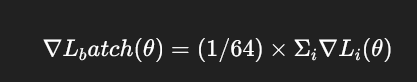

In [49]:
model.eval()
with torch.no_grad():
  outputs = model(X_train)
print(outputs)

tensor([[ 2.5247, -2.3698],
        [ 2.3828, -2.2251],
        [ 2.1684, -2.0081],
        [-2.0328,  2.1993],
        [-2.4188,  2.5964]])


In [50]:
torch.set_printoptions(sci_mode=False)
probas = torch.softmax(outputs, dim=1)
print(probas)

tensor([[0.9926, 0.0074],
        [0.9901, 0.0099],
        [0.9849, 0.0151],
        [0.0143, 0.9857],
        [0.0066, 0.9934]])


In [51]:
predictions = torch.argmax(probas, dim=1)
print(predictions)

tensor([0, 0, 0, 1, 1])


In [52]:
predictions = torch.argmax(outputs, dim=1)
print(predictions)

tensor([0, 0, 0, 1, 1])


In [53]:
def compute_accuracy(model, dataloader):
  model = model.eval()
  correct = 0.0
  total_examples = 0
  for idx, (features, labels) in enumerate(dataloader):
    with torch.no_grad():
      logits = model(features)
    predictions = torch.argmax(logits, dim = 1)
    compare = (predictions == labels)
    correct += torch.sum(compare)
    total_examples += len(compare)
  return (correct / total_examples).item() # .item() to take value from a tensor, note that the correct 'maybe' a tensor because of the torch.sum

In [54]:
compute_accuracy(model, train_loader)

1.0

In [55]:
compute_accuracy(model, test_loader)

1.0

# Save and load model:

In [56]:
torch.save(model.state_dict(), 'model.pth')

In [57]:
model = NeuralNetwork(2, 2)
model.load_state_dict(torch.load("model.pth"))

<All keys matched successfully>

# Optimize with GPUs

In [58]:
# CPU
tensor_1 = torch.tensor([1., 2., 3.])
tensor_2 = torch.tensor([4., 5., 6.])
print(tensor_1 + tensor_2)

tensor([5., 7., 9.])


In [59]:
# GPU
tensor_1 = tensor_1.to("cuda")
tensor_2 = tensor_2.to("cuda")
print(tensor_1 + tensor_2)

tensor([5., 7., 9.], device='cuda:0')


In [60]:
torch.cuda.is_available()

True

**Note:** we *can't* use tensor operations between 2 tensors from different devices (GPU, CPU,...)

## Implement a single GPU to the loop:

In [61]:
model = NeuralNetwork(num_inputs=2, num_outputs=2)

num_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Number of parameters: {num_params}")

# change the model to device
device = torch.device("cuda")
model = model.to(device)

optimizer = torch.optim.SGD(
    model.parameters(), lr = 0.5
)

num_epochs = 3

for epoch in range(num_epochs):

  model.train()

  for batch_idx, (features, labels) in enumerate(train_loader):
    features, labels = features.to(device), labels.to(device)
    logits = model(features)

    loss = F.cross_entropy(logits, labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    ### LOGGING
    print(f"Epoch: {epoch+1:03d}/{num_epochs:03d}"
    f" | Batch {batch_idx:03d}/{len(train_loader):03d}"
    f" | Train Loss: {loss:.2f}")
  model.eval()

Number of parameters: 752
Epoch: 001/003 | Batch 000/002 | Train Loss: 0.72
Epoch: 001/003 | Batch 001/002 | Train Loss: 0.46
Epoch: 002/003 | Batch 000/002 | Train Loss: 0.26
Epoch: 002/003 | Batch 001/002 | Train Loss: 0.09
Epoch: 003/003 | Batch 000/002 | Train Loss: 0.06
Epoch: 003/003 | Batch 001/002 | Train Loss: 0.03


In [69]:
matrix = torch.randn(1000, 1000)

In [70]:
# CPU
%timeit matrix @ matrix

16.8 ms ± 2.83 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [71]:
matrix.to("cuda")

tensor([[ 0.1518, -0.8227,  0.0992,  ...,  0.6439,  0.1619,  0.0782],
        [ 1.1957, -0.2181,  0.0545,  ..., -2.5368, -0.3204,  1.2685],
        [ 0.7891, -0.7605,  0.5755,  ...,  1.3839, -1.0642,  0.5763],
        ...,
        [ 0.2601,  1.3255,  0.8289,  ...,  0.0650, -0.4728,  0.2019],
        [ 1.0083,  0.5611, -0.2604,  ...,  0.7915,  0.6762,  1.2215],
        [ 1.2482, -1.8676,  1.0444,  ...,  0.8183, -2.1400, -0.6283]],
       device='cuda:0')

In [72]:
# GPU
%timeit matrix @ matrix

16.5 ms ± 2.65 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
